In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("Clean_df")

In [7]:
df.head()

Unnamed: 0  ID Project Code            PQ # PO / SO # ASN/DN #  \
0           0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8   
1           1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85   
2           2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14   
3           3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50   
4           4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55   

         Country Managed By  Fulfill Via Vendor INCO Term  ...  \
0  Côte d'Ivoire   PMO - US  Direct Drop              EXW  ...   
1        Vietnam   PMO - US  Direct Drop              EXW  ...   
2  Côte d'Ivoire   PMO - US  Direct Drop              FCA  ...   
3        Vietnam   PMO - US  Direct Drop              EXW  ...   
4        Vietnam   PMO - US  Direct Drop              EXW  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1                        240               1000          6200.0       6.20   
2                        100                500         40000.0      80.00   
3                         60              31920        127360.8       3.99   
4                         60              38000        121600.0       3.20   

  Unit Price             Manufacturing Site First Line Designation  \
0       0.97     Ranbaxy Fine Chemicals LTD                    Yes   
1       0.03      Aurobindo Unit III, India                    Yes   
2       0.80  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3       0.07  Ranbaxy, Paonta Shahib, India                    Yes   
4       0.05      Aurobindo Unit III, India                    Yes   

  Weight (Kilograms) Freight Cost (USD) Line Item Insurance (USD)  
0               13.0             780.34                      0.83  
1              358.0            4521.50                      9.31  
2              171.0            1653.78                     60.09  
3             1855.0           16007.06                    191.34  
4             7590.0           45450.08                    182.68  

[5 rows x 34 columns]

In [9]:
# droping Unwanted columns
df.drop(columns =['Unnamed: 0',"ID"], inplace =True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Project Code                  9964 non-null   object        
 1   PQ #                          9964 non-null   object        
 2   PO / SO #                     9964 non-null   object        
 3   ASN/DN #                      9964 non-null   object        
 4   Country                       9964 non-null   object        
 5   Managed By                    9964 non-null   object        
 6   Fulfill Via                   9964 non-null   object        
 7   Vendor INCO Term              9964 non-null   object        
 8   Shipment Mode                 9964 non-null   object        
 9   PQ First Sent to Client Date  9964 non-null   datetime64[ns]
 10  PO Sent to Vendor Date        9964 non-null   datetime64[ns]
 11  Scheduled Delivery Date       

In [12]:
# numerical columns
num_df = df.select_dtypes(include =['int', 'float'])
num_cols= num_df.columns

In [13]:
num_cols

Index(['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [14]:
#Convering dates into datetime format. For 'PQ First Sent to Client Date' ,'PO Sent to Vendor Date ' . Coerce the errors as some of the dates are not defined.
dt = ['PQ First Sent to Client Date' ,'PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date', 'Delivery Recorded Date']
for col in dt:
    df[col] = pd.to_datetime(df[col], errors = 'coerce')

In [15]:
# numerical columns
cat_df = df.select_dtypes(include =['object'])
cat_cols= cat_df.columns

In [16]:
cat_cols

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'Product Group', 'Sub Classification', 'Vendor', 'Item Description',
       'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form',
       'Manufacturing Site', 'First Line Designation'],
      dtype='object')

In [18]:
cat_date_df = df.select_dtypes(include =['datetime64[ns]'])
cat_date_cols= cat_date_df.columns

In [19]:
cat_date_cols

Index(['PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date'],
      dtype='object')

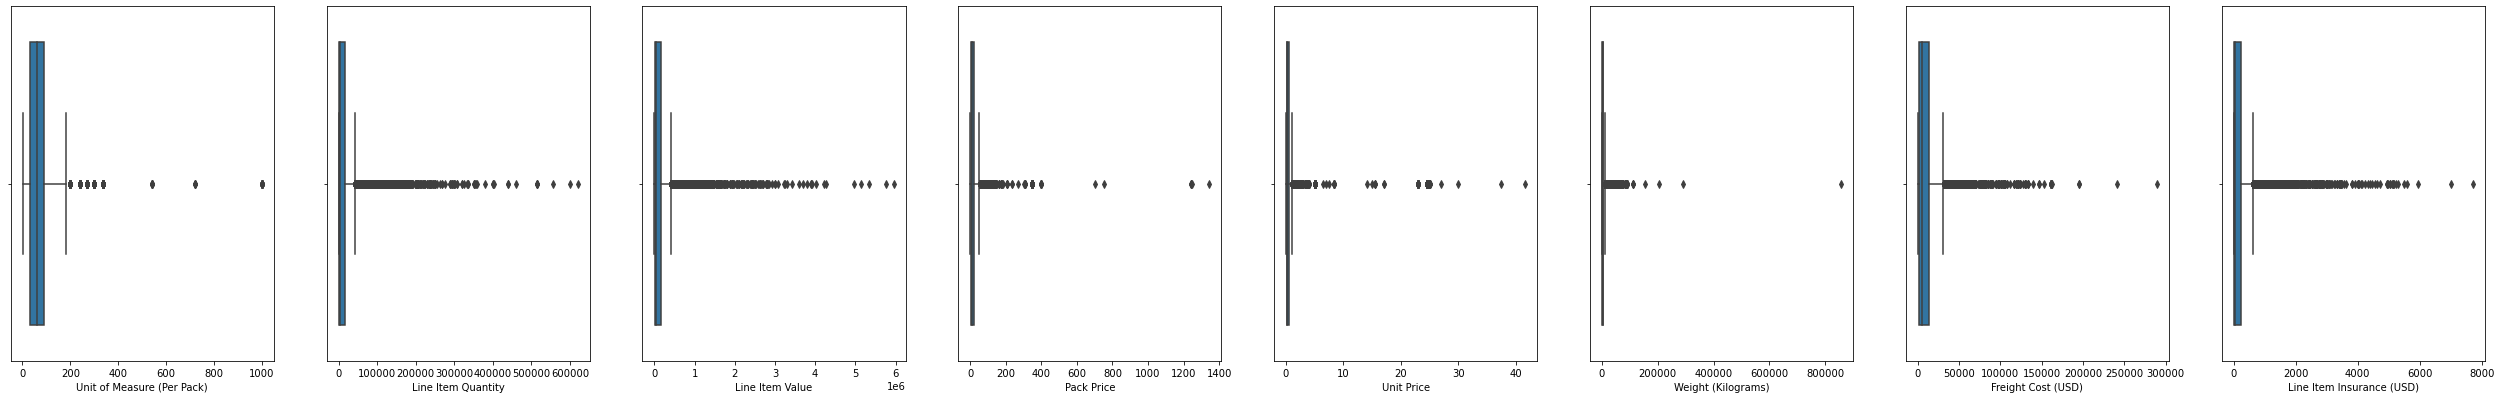

In [24]:
plt.figure(figsize=(50,30))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

In [34]:
for i in num_cols:
    fig  = px.box(data_frame=df,x=i)
    fig.show()

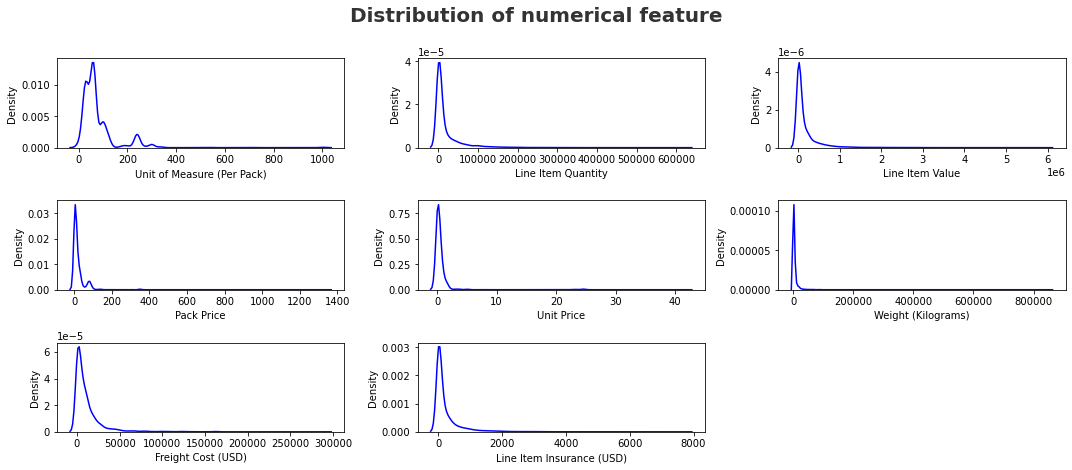

In [26]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if (df[feature].dtype != 'O' and df[feature].dtype != 'datetime64[ns]')]
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [36]:
for i in num_cols:
    fig = px.histogram(data_frame=df, x = i)
    fig.show()

In [28]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []

for i in num_df.columns:
    count_outliers(num_df,i)

There are outliers in Unit of Measure (Per Pack)
Count of outliers are: 963
There are outliers in Line Item Quantity
Count of outliers are: 1298
There are outliers in Line Item Value
Count of outliers are: 1075
There are outliers in Pack Price
Count of outliers are: 1121
There are outliers in Unit Price
Count of outliers are: 851
There are outliers in Weight (Kilograms)
Count of outliers are: 876
There are outliers in Freight Cost (USD)
Count of outliers are: 705
There are outliers in Line Item Insurance (USD)
Count of outliers are: 1100


# Z- Score

In [37]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [38]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [39]:
replace_with_thresholds(num_df, num_df.columns)

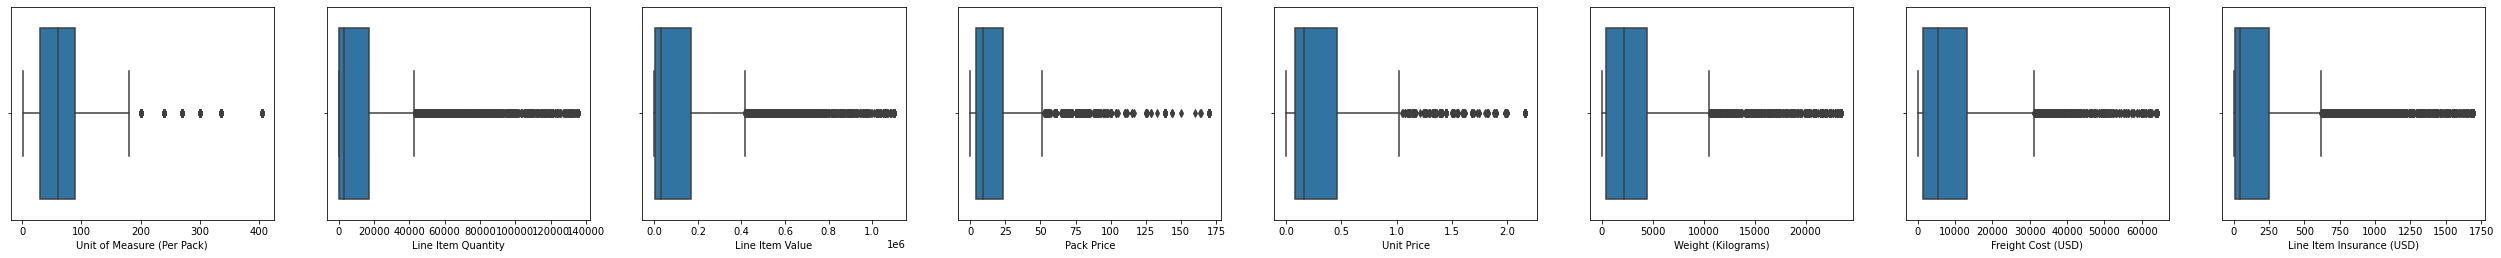

In [40]:
plt.figure(figsize=(50,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

# IQR Method

In [41]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [49]:
for i in num_cols:
    remove_outliers_IQR(i)

percentile25 30.0
percentile75 90.0
Upper limit 180.0
Lower limit -60.0
percentile25 405.0
percentile75 17441.75
Upper limit 42996.875
Lower limit -25150.125
percentile25 4272.032499999999
percentile75 168667.34999999998
Upper limit 415260.3262499999
Lower limit -242320.94374999995
percentile25 4.12
percentile75 23.26
Upper limit 51.97
Lower limit -24.59
percentile25 0.08
percentile75 0.46
Upper limit 1.03
Lower limit -0.49000000000000005
percentile25 404.0
percentile75 4464.293406972731
Upper limit 10554.733517431827
Lower limit -5686.440110459096
percentile25 1374.7324999999998
percentile75 13290.31
Upper limit 31163.676249999997
Lower limit -16498.63375
percentile25 6.53
percentile75 251.73
Upper limit 619.53
Lower limit -361.27


In [46]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

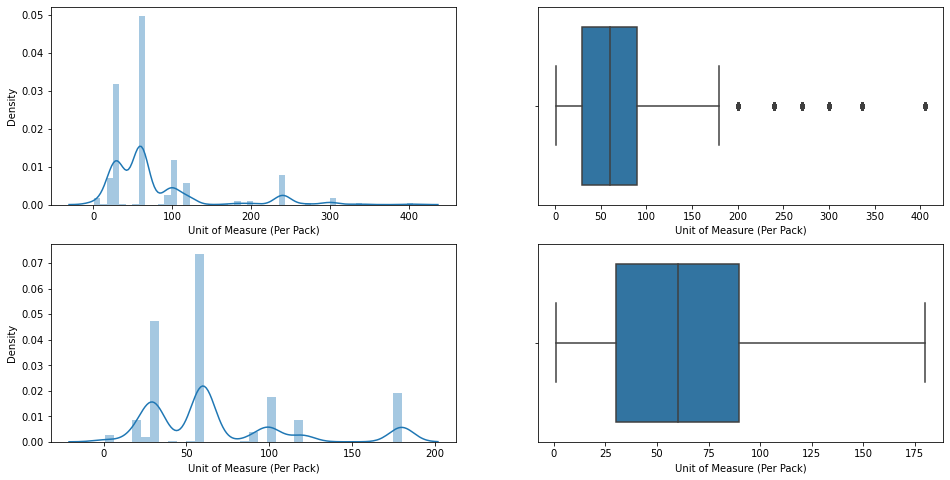

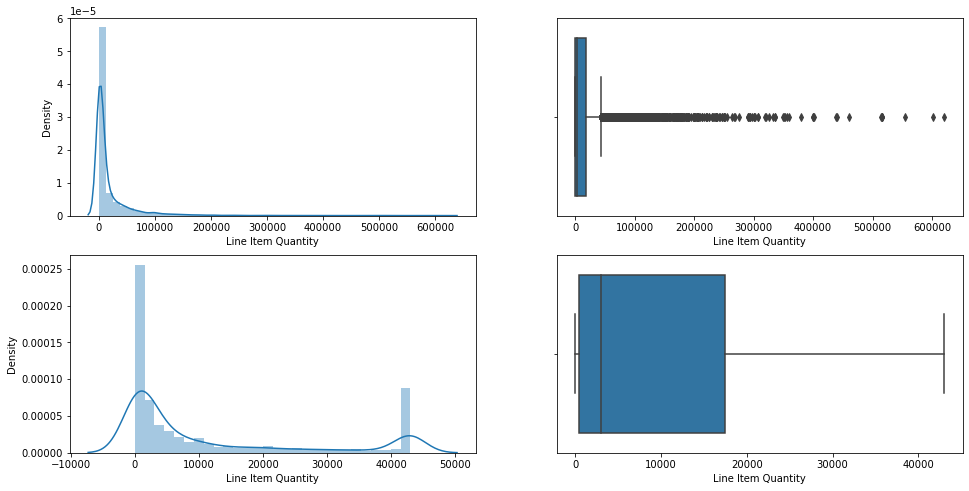

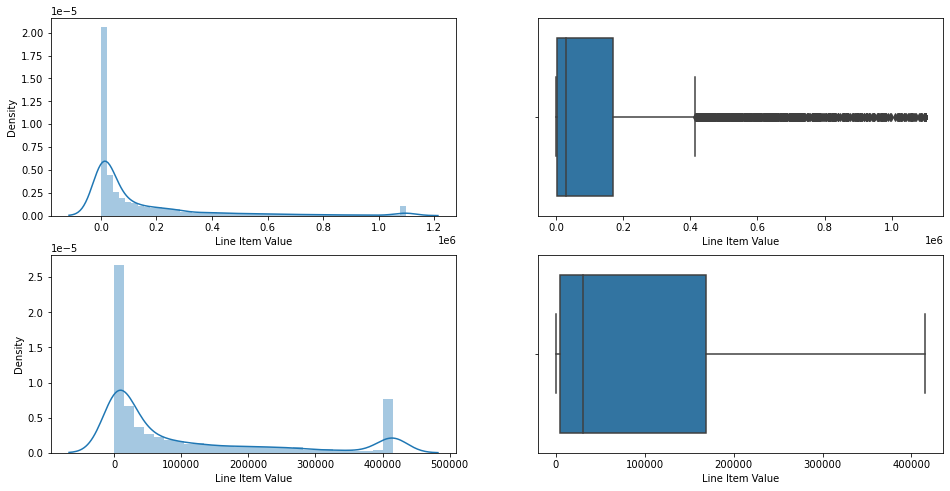

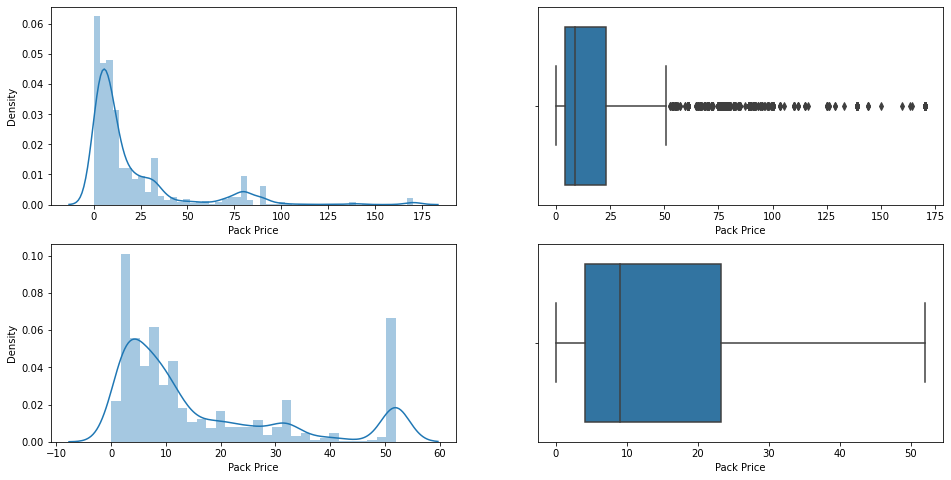

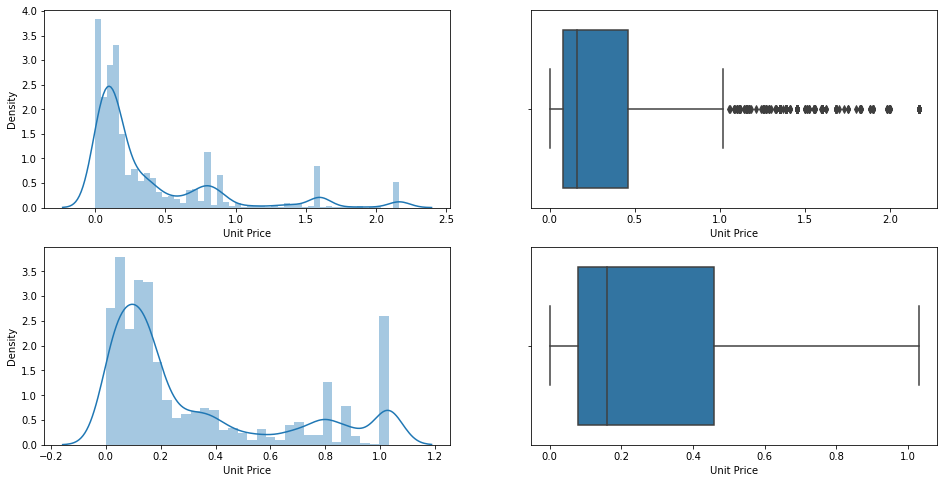

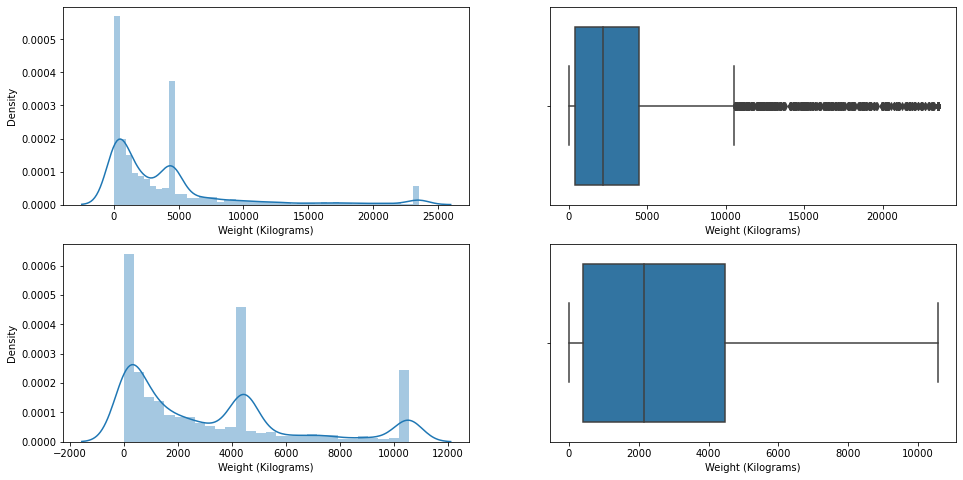

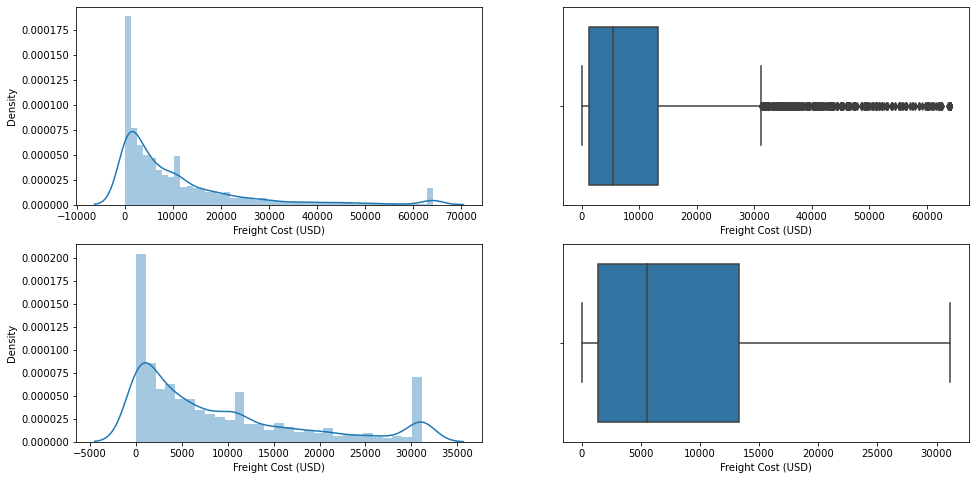

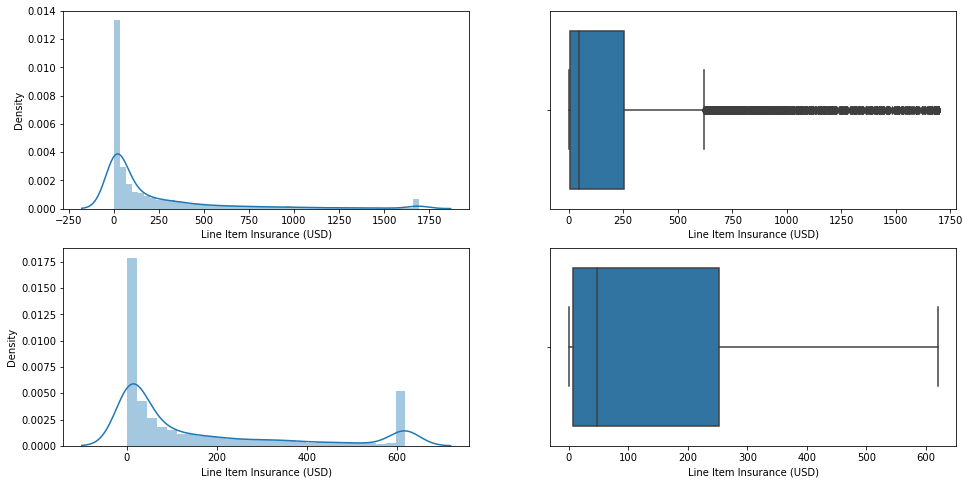

In [50]:
for i in num_cols:
    create_comparison_plot(df,df1,i)

# Comparing Skewness

In [51]:
df.skew()

Unit of Measure (Per Pack)    2.134866
Line Item Quantity            4.991901
Line Item Value               2.455291
Pack Price                    2.581504
Unit Price                    2.039829
Weight (Kilograms)            2.321506
Freight Cost (USD)            2.246821
Line Item Insurance (USD)     2.475646
dtype: float64

In [52]:
df1.skew()

Unit of Measure (Per Pack)    1.283073
Line Item Quantity            1.231543
Line Item Value               1.256016
Pack Price                    1.237220
Unit Price                    1.108631
Weight (Kilograms)            1.039423
Freight Cost (USD)            1.134690
Line Item Insurance (USD)     1.244328
dtype: float64

In [53]:
df1.to_csv('outlier_removed.csv', index=False)

In [55]:
df.head()

Project Code            PQ # PO / SO # ASN/DN #        Country Managed By  \
0   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   PMO - US   
1   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   PMO - US   
2   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   PMO - US   
3   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   PMO - US   
4   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   PMO - US   

   Fulfill Via Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0  Direct Drop              EXW           Air                   2005-12-12   
1  Direct Drop              EXW           Air                   2006-05-26   
2  Direct Drop              FCA           Air                   2006-03-08   
3  Direct Drop              EXW           Air                   2006-03-13   
4  Direct Drop              EXW           Air                   2006-02-20   

   ... Unit of Measure (Per Pack) Line Item Quantity Line Item Value  \
0  ...                         30                 19           551.0   
1  ...                        240               1000          6200.0   
2  ...                        100                500         40000.0   
3  ...                         60              31920        127360.8   
4  ...                         60              38000        121600.0   

  Pack Price Unit Price             Manufacturing Site First Line Designation  \
0      29.00       0.97     Ranbaxy Fine Chemicals LTD                    Yes   
1       6.20       0.03      Aurobindo Unit III, India                    Yes   
2      80.00       0.80  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3       3.99       0.07  Ranbaxy, Paonta Shahib, India                    Yes   
4       3.20       0.05      Aurobindo Unit III, India                    Yes   

  Weight (Kilograms) Freight Cost (USD) Line Item Insurance (USD)  
0               13.0             780.34                      0.83  
1              358.0            4521.50                      9.31  
2              171.0            1653.78                     60.09  
3             1855.0           16007.06                    191.34  
4             7590.0           45450.08                    182.68  

[5 rows x 32 columns]

In [54]:
df1.head()

Project Code            PQ # PO / SO # ASN/DN #        Country Managed By  \
0   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   PMO - US   
1   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   PMO - US   
2   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   PMO - US   
3   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   PMO - US   
4   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   PMO - US   

   Fulfill Via Vendor INCO Term Shipment Mode PQ First Sent to Client Date  \
0  Direct Drop              EXW           Air                   2005-12-12   
1  Direct Drop              EXW           Air                   2006-05-26   
2  Direct Drop              FCA           Air                   2006-03-08   
3  Direct Drop              EXW           Air                   2006-03-13   
4  Direct Drop              EXW           Air                   2006-02-20   

   ... Unit of Measure (Per Pack) Line Item Quantity Line Item Value  \
0  ...                       30.0               19.0           551.0   
1  ...                      180.0             1000.0          6200.0   
2  ...                      100.0              500.0         40000.0   
3  ...                       60.0            31920.0        127360.8   
4  ...                       60.0            38000.0        121600.0   

  Pack Price Unit Price             Manufacturing Site First Line Designation  \
0      29.00       0.97     Ranbaxy Fine Chemicals LTD                    Yes   
1       6.20       0.03      Aurobindo Unit III, India                    Yes   
2      51.97       0.80  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3       3.99       0.07  Ranbaxy, Paonta Shahib, India                    Yes   
4       3.20       0.05      Aurobindo Unit III, India                    Yes   

  Weight (Kilograms) Freight Cost (USD) Line Item Insurance (USD)  
0               13.0          780.34000                      0.83  
1              358.0         4521.50000                      9.31  
2              171.0         1653.78000                     60.09  
3             1855.0        16007.06000                    191.34  
4             7590.0        31163.67625                    182.68  

[5 rows x 32 columns]